# Introduction and dataset

In this notebook i'll prediction of house prices in King county, Washington, USA, using Linear Regression .
The data used is from the houses in King county, USA between 2014 and 2015. 

Here is a description of the columns in the dataset.

`id` - Unique ID for each home sold.

`date` - Date of the home sale.

`price` - Price of each home sold.

`bedrooms` - Number of bedrooms.

`bathrooms` - Number of bathrooms, where .5 accounts for a room with a toilet but no shower.

`sqft_living` - Square footage of the apartments interior living space.

`sqft_lot` - Square footage of the land space.

`floors` - Number of floors.

`waterfront` - A dummy variable for whether the apartment was overlooking the waterfront or not.

`view` - An index from 0 to 4 of how good the view of the property was.

`condition` - An index from 1 to 5 on the condition of the apartment.

`grade` - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

`sqft_above` - The square footage of the interior housing space that is above ground level.

`sqft_basement` - The square footage of the interior housing space that is below ground level.

`yr_built` - The year the house was initially built.

`yr_renovated` - The year of the house’s last renovation.

`zipcode` - What zipcode area the house is in.

`lat` - Latitude.

`long` - Longitude.

`sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors.

`sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors.

In [1]:
# Importing basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory data analysis

I'll load the dataset and perform some exploratory data analysis to get a better understanding of the different features.


In [2]:
house_data = pd.read_csv('kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The dataset has 21,613 entries and there aren't missing values. 

In [6]:
house_data['date'] = pd.to_datetime(house_data['date'])

<AxesSubplot:ylabel='price'>

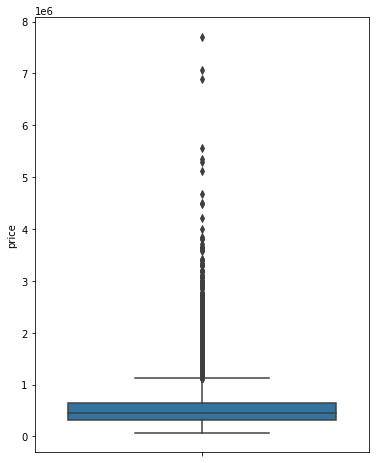

In [7]:
# The feature we want to predict is the price.

plt.figure(figsize=(6,8))
sns.boxplot(y='price',data=house_data)

There are many outliers in the `price` feature. 

I= (q0.25−1.5∗IQR ; q0.75+1.5∗IQR)

Everything outside that interval is labeled as outlier.

In [8]:
# Upper limit of I

6.450000e+05 + 1.5 * (6.450000e+05 - 3.219500e+05)

1129575.0

In [9]:
house_data[house_data['price']>=1129575.0]['price'].count()

1146

In [10]:
1146/len(house_data)*100

5.302364317771711

The amount of data points labeled as outlier is 1146, which represents just 5.3% of the dataset. I will procede to drop it in order to build a more accurate prediction model.

In [11]:
house_data = house_data[house_data['price']<1129575.0]

<AxesSubplot:xlabel='price', ylabel='Count'>

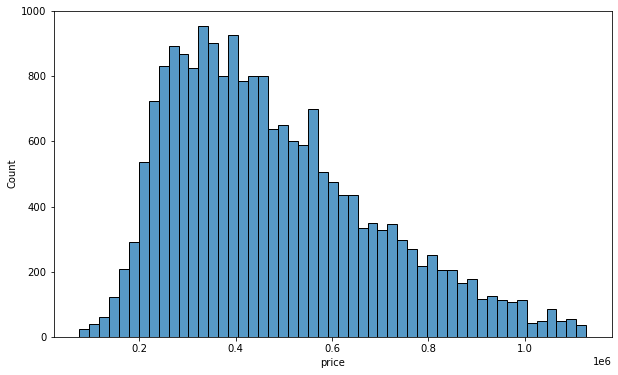

In [12]:
# Lets now check the distribution of the price

plt.figure(figsize=(10,6))
sns.histplot(data=house_data,x='price')

In [13]:
# Lets now check the correlation of the features with the price

house_data.corr()['price'].sort_values()

zipcode         -0.018511
id               0.010416
condition        0.038275
waterfront       0.051449
yr_built         0.061144
long             0.070863
sqft_lot15       0.082420
yr_renovated     0.083601
sqft_lot         0.093950
sqft_basement    0.235701
view             0.238268
floors           0.273987
bedrooms         0.296956
lat              0.430762
bathrooms        0.455927
sqft_above       0.530451
sqft_living15    0.562090
sqft_living      0.622333
grade            0.631182
price            1.000000
Name: price, dtype: float64

<AxesSubplot:>

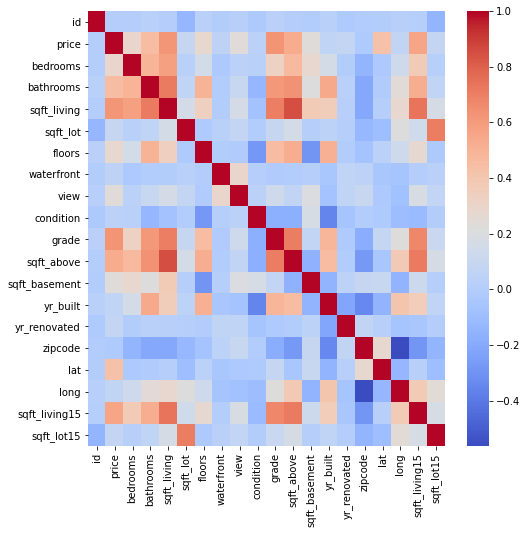

In [14]:
# And also lets visualize it

plt.figure(figsize=(8,8))
sns.heatmap(data=house_data.corr(),cmap='coolwarm')

The `grade` and the `sqft_living` features are the ones with the highest correlation with the price. I'll take a look at them.

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

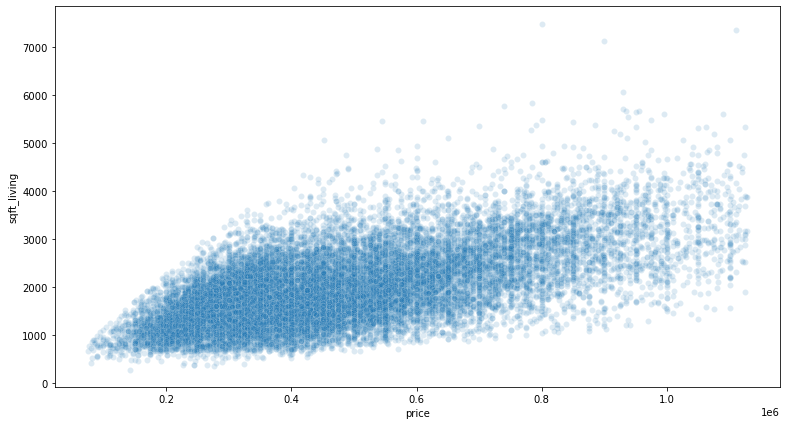

In [15]:
# Livig square foot

plt.figure(figsize=(13,7))
sns.scatterplot(x='price',y='sqft_living',data=house_data,alpha=0.15)

<AxesSubplot:xlabel='grade', ylabel='count'>

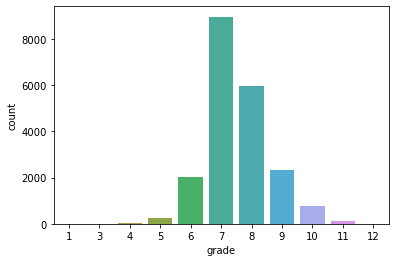

In [16]:
# Grade

sns.countplot(x='grade', data=house_data)

<AxesSubplot:xlabel='grade', ylabel='price'>

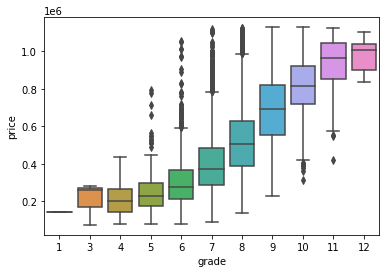

In [17]:
sns.boxplot(x='grade',y='price',data=house_data)

Most of houses have are labeled with a grade number 7, which indicates an average on "construction and design".


<AxesSubplot:xlabel='waterfront', ylabel='price'>

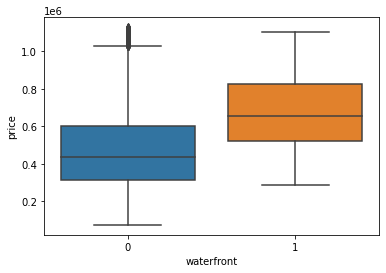

In [18]:
# Waterfront
# Usually people pay more to live in the waterfront. I'll check if this happens here.

sns.boxplot(x='waterfront',y='price',data=house_data)

I can see on average, the houses in the waterfront are more expensive. But the most expensive ones are actually not in the waterfront.

Now, I'll take a look at latitud and longitud. We can plot it in a way to resemble the map of the area.


<AxesSubplot:xlabel='long', ylabel='lat'>

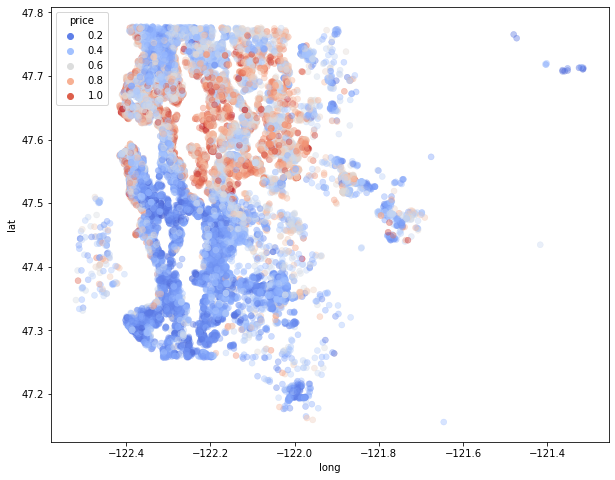

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',data=house_data,hue='price',alpha=0.4,palette='coolwarm',edgecolor=None)

The red areas show the most expensivehouses, so we have an idea now what are the expensive areas in the city.

Now I'll check the date information. Since i fixed the data type, I can perform operations with that feature. For example, it will be helpful to create new columns for the month and year.

In [21]:
house_data['year'] = house_data['date'].apply(lambda x:x.year)
house_data['month'] = house_data['date'].apply(lambda x:x.month)

house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='year'>

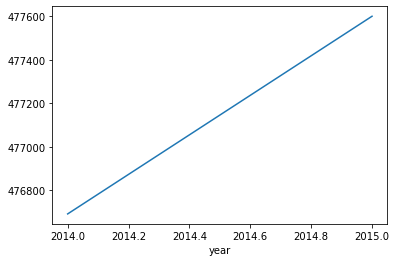

In [22]:
# Now lets check the relation between price and time

house_data.groupby(by='year').mean()['price'].plot()

<AxesSubplot:xlabel='month'>

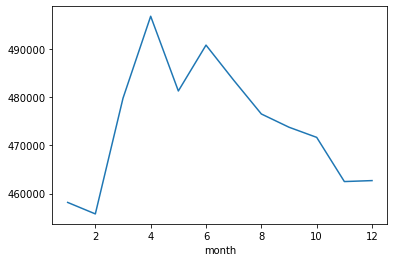

In [23]:
house_data.groupby(by='month').mean()['price'].plot()

This goes in line with the increase of house prices with the time.
Regarding the months, i can see a decrease in prices after June, reaching the lowest level in February.
Now, i'll check the zipcode information, which is the feature with almost no correlation with the price in the dataset.

In [24]:
house_data['zipcode'].nunique()

70

In [25]:
house_data['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98003, 98198, 98146, 98038,
       98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133, 98092,
       98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001, 98056,
       98166, 98053, 98023, 98148, 98105, 98042, 98008, 98059, 98122,
       98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118, 98199,
       98040, 98032, 98045, 98102, 98077, 98108, 98168, 98177, 98065,
       98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031,
       98106, 98070, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [26]:
house_data.drop(['zipcode','id','date'],axis=1,inplace=True)

Now the dataframe looks like this:

In [27]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [28]:
house_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

# Linear regression model


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [30]:
X = house_data.drop('price',axis=1)
y = house_data['price']

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.3, random_state=1)

In [66]:
model_lr = LinearRegression()

In [67]:
model_lr.fit(X_train,y_train)

LinearRegression()

In [68]:
model_lr.coef_

array([-2.96834216e+05,  1.92971533e+05, -8.18964146e+16,  3.61463413e+05,
        8.24237687e+04,  1.06596883e+05,  1.15902932e+05,  1.12040772e+05,
        7.97531435e+05,  6.17355448e+16,  3.09816756e+16, -2.01579291e+05,
        2.92373142e+04,  3.30799546e+05, -2.00578060e+04,  2.45408470e+05,
       -7.09986796e+04,  2.31726730e+04,  3.83309554e+03])

In [69]:
house_coef = pd.DataFrame(data=model_lr.coef_, index=X.columns, columns=['Coeff'])
house_coef

,Coeff
bedrooms,-2.968342e+05
bathrooms,1.929715e+05
sqft_living,-8.189641e+16
sqft_lot,3.614634e+05
floors,8.242377e+04
waterfront,1.065969e+05
view,1.159029e+05
condition,1.120408e+05
grade,7.975314e+05
sqft_above,6.173554e+16


In [70]:
predictions_lr = model_lr.predict(X_test)

### Linear Regression evaluation

Lets check first how the predictions and the true values of the prices (y_test) look together. If I get a straigth line, it would mean the model is excelent.

<AxesSubplot:xlabel='price'>

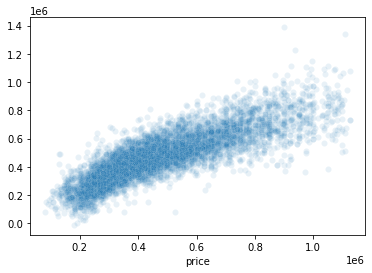

In [71]:
sns.scatterplot(x=y_test,y=predictions_lr,alpha=0.1)

In [72]:
# MAE (Mean Absolute Error)
MAE_lr = mean_absolute_error(y_test,predictions_lr)
MAE_lr

86368.45937384458

In [73]:
# MSE (Mean Squared Error)
MSE_lr = mean_squared_error(y_test,predictions_lr)
MSE_lr

13226630727.95806

In [74]:
# RMSE (Root Mean Squared Error)
RMSE_lr = np.sqrt(mean_squared_error(y_test,predictions_lr))
RMSE_lr

115007.0899030058

In [75]:
# r2_score
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions_lr)
r2

0.6957795759905059

In [76]:
#Random forest reg
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [78]:
y_pred_rf = rf_reg.predict(X_test)

In [79]:
rf_rmse = (mean_squared_error(y_test, y_pred_rf))
rf_rmse = np.sqrt(rf_rmse)
rf_rmse

75927.77797809965

In [80]:
# r2_score
r2_score(y_test, y_pred_rf)

0.8674009173595113